In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("./benchmarkResults/25-07_benchmark_results.csv")
dfg = pd.read_csv("./benchmarkResults/greedy_benchmark_results.csv")

dfng = pd.read_csv("./benchmarkResults/greedy_incremental_rob_num.csv")

dfng

,file,time,#nodes,pathlength,horizon,#moves
0,num_robots_benchmark\10robs.lp,3.399227,26,21,14,59
1,num_robots_benchmark\11robs.lp,9.065166,69,46,14,85
2,num_robots_benchmark\12robs.lp,19.861134,59,43,14,92
3,num_robots_benchmark\13robs.lp,26.939125,72,41,14,96
4,num_robots_benchmark\14robs.lp,31.112223,124,71,14,104
5,num_robots_benchmark\15robs.lp,25.210158,90,56,14,112
6,num_robots_benchmark\16robs.lp,30.002659,99,62,14,106
7,num_robots_benchmark\17robs.lp,31.023188,96,60,14,127
8,num_robots_benchmark\18robs.lp,67.029485,215,110,14,129
9,num_robots_benchmark\19robs.lp,53.268207,177,108,14,128


In [33]:
def size(row):
    return int(str(row["file"]).split("/")[2][-1])

def density(row):
    return int(str(row["file"]).split("/")[3][-2:])

def ex(row):
    return int(str(row["file"]).split("/")[4][2])

def num(row):
    return int(str(row["file"]).split("/")[0].split("\\")[1].split("r")[0])

df['size'] = df.apply(lambda row: size(row), axis=1)
df['density'] = df.apply(lambda row: density(row), axis=1)
df['ex'] = df.apply(lambda row: ex(row), axis=1)
            
dfg['size'] = dfg.apply(lambda row: size(row), axis=1)
dfg['density'] = dfg.apply(lambda row: density(row), axis=1)
dfg['ex'] = dfg.apply(lambda row: ex(row), axis=1)

dfng['num'] = dfng.apply(lambda row: num(row), axis=1)

dfnga = dfng.iloc[0:10]
dfngb = dfng.iloc[10:]

dfng = pd.concat([dfngb, dfnga], sort=False)
dfng

,file,time,#nodes,pathlength,horizon,#moves,num
10,num_robots_benchmark\2robs.lp,0.038835,2,0,5,7,2
11,num_robots_benchmark\3robs.lp,0.037731,2,0,6,14,3
12,num_robots_benchmark\4robs.lp,0.034896,2,0,6,21,4
13,num_robots_benchmark\5robs.lp,0.038889,2,0,6,22,5
14,num_robots_benchmark\6robs.lp,0.042359,2,0,6,28,6
15,num_robots_benchmark\7robs.lp,0.048213,2,0,6,31,7
16,num_robots_benchmark\8robs.lp,4.013643,12,8,14,50,8
17,num_robots_benchmark\9robs.lp,4.288100,15,12,14,52,9
0,num_robots_benchmark\10robs.lp,3.399227,26,21,14,59,10
1,num_robots_benchmark\11robs.lp,9.065166,69,46,14,85,11


In [314]:
# sort data by size + density

def sort_by_category(to_sort):
    '''returns list of DataFrames'''
    lcg = [] #(List of Categorised Groups)
    for i in range(int((len(to_sort)-1)/15)):
        lcg.append(to_sort.iloc[(i*15):(i*15+15)])
    return lcg

# list of DataFrames, split by size + density
catList = sort_by_category(df)
greedyCatList = sort_by_category(dfg)



# for every df in received list, 
# calculate how many NaN rows are in there
# returns: list of int

def nan_counter(cat_df):
    lc = [] # List of Counts
    for elem in cat_df:
        counter = 0
        for i in range(15):
            if np.isnan(elem["time"].iloc[i]):
                counter += 1
        lc.append(counter)
    return lc

# list of NaN rows in cat_list df
nanList = nan_counter(catList)
greedyNanList = nan_counter(greedyCatList)



# calculate list of mean times 
def mean_list(df_list):
    l = []
    for elem in df_list:
        l.append(elem.mean()[0])
    return l

# list of mean times for each size + density combination
mean = mean_list(cat_list)
mean

[0.36792573606556594,
 2.5683630408680376,
 53.87192752490889,
 8.118940189333323,
 40.09910480566808,
 74.35030599328873,
 3.891080764215855,
 10.055426807000913,
 nan,
 44.926600583920774,
 173.4262973169971]

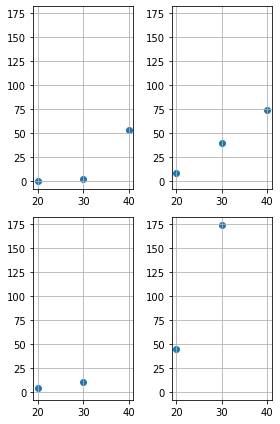

In [313]:
# df1 = df.loc[(df['ex']==1)].copy(deep=True)
# df2 = df.loc[(df['ex']==2)]
# df3 = df.loc[(df['ex']==3)]

# df1['time'] = df['time'].fillna(5*60)


# plot mean times for each density/size combination
points = np.linspace(0, len(mean), len(mean))
points = [20,30,40]
  


fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharey=ax1, sharex=ax1)
ax3 = fig.add_subplot(2, 2, 3, sharey=ax1, sharex=ax1)
ax4 = fig.add_subplot(2, 2, 4, sharey=ax1, sharex=ax1)

ax1.scatter(points, mean[:3])
ax2.scatter(points, mean[3:6])
ax3.scatter(points, mean[6:9])
ax4.scatter(points[:-1], mean[9:])

fig.set_size_inches(4, 6, forward=True)
fig.tight_layout()


ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.show()

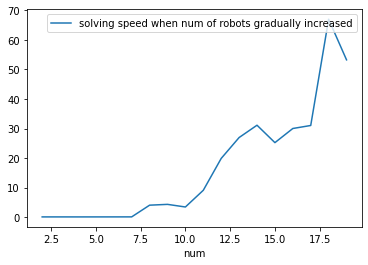

In [37]:
# plotting the data from incrementally increasing num of robots

dfng.plot(x="num", y="time", label="solving speed when num of robots gradually increased")
plt.show()

In [ ]:
ideas:
    dreidimensionale Grafik (size - density - time)
    Durchschnitt aus allen drei ex ziehen (exclude NaN?)
    neu messen mit kleineren Abständen bei Dichte
    Optimalität bei greedy vs normal vergleichen
    erstelle mehr num_robots_benchmark Verzeichnisse 
        und bilde Mittel über versch. Messwerte
    
Was für Aufgaben müssen noch erfüllt werden?
    Arbeit schreiben
    Kommentare in Code schreiben
    Github Erklärungen/Aufbau verbessern